In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import __version__
import matplotlib.pyplot as plt
import tensorflow_model_optimization as tfmot

import pandas as pd
import seaborn as sb    

In [2]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

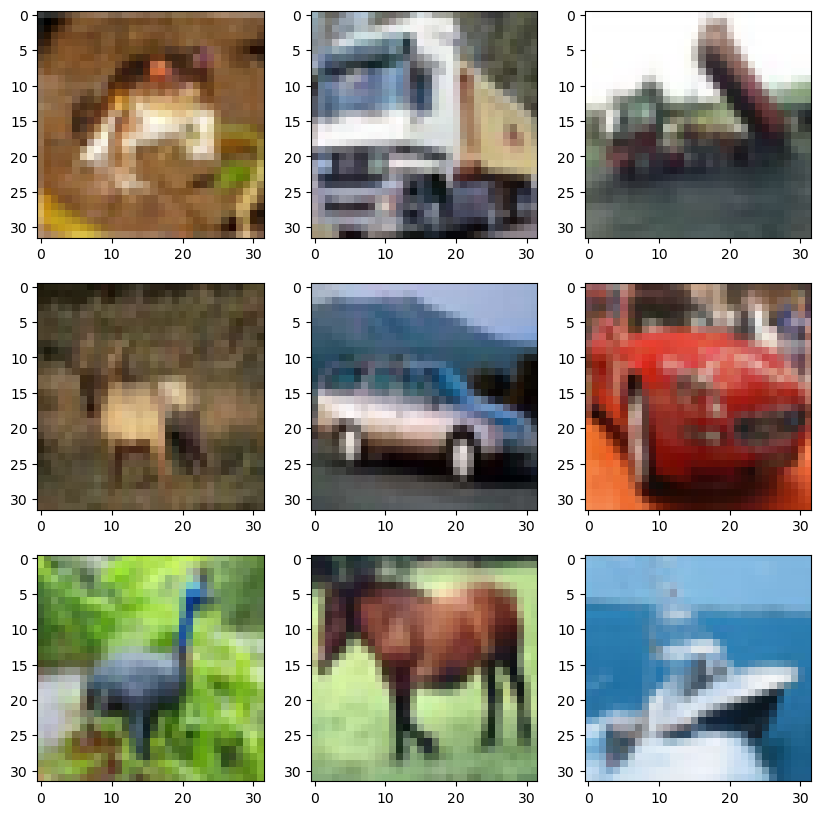

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [7]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
class_names[y_train_full[8][0]]

'ship'

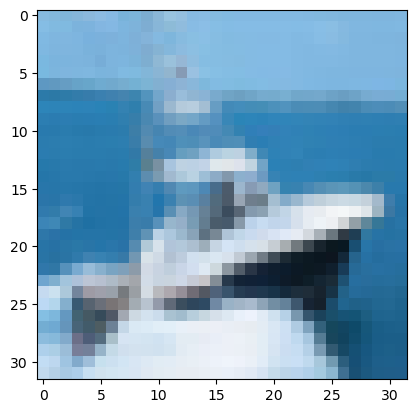

In [9]:
plt.imshow(X_train_full[8], cmap=plt.get_cmap('gray'))

In [10]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [11]:
X_train[0]

array([[[0.23529412, 0.32156863, 0.21176471],
        [0.15686275, 0.26666667, 0.14117647],
        [0.20392157, 0.31764706, 0.20392157],
        ...,
        [0.20784314, 0.16862745, 0.19607843],
        [0.25882353, 0.21568627, 0.23921569],
        [0.28627451, 0.24313725, 0.26666667]],

       [[0.43921569, 0.44705882, 0.44705882],
        [0.22745098, 0.27843137, 0.21960784],
        [0.22745098, 0.31764706, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490196],
        [0.28235294, 0.24313725, 0.27058824]],

       [[0.66666667, 0.63137255, 0.69803922],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.31372549, 0.34901961, 0.29019608],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.2745098 , 0.24705882, 0.2745098 ],
        [0.28235294, 0.25098039, 0.27843137]],

       ...,

       [[0.35686275, 0.44313725, 0.36862745],
        [0.23137255, 0.3254902 , 0.24313725],
        [0.17647059, 0

In [12]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[32,32,3]),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(10, activation = "softmax")
            ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 10)                3

In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32)

Epoch 1/30


1407/1407 [==============================] - 10s 6ms/step - loss: 1.9834 - accuracy: 0.3073 - val_loss: 1.9836 - val_accuracy: 0.3056
Epoch 2/30
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6753 - accuracy: 0.3992 - val_loss: 1.7951 - val_accuracy: 0.3520
Epoch 3/30
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5819 - accuracy: 0.4293 - val_loss: 1.6656 - val_accuracy: 0.3960
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5170 - accuracy: 0.4577 - val_loss: 1.5931 - val_accuracy: 0.4200
Epoch 5/30
1407/1407 [==============================] - 8s 5ms/step - loss: 1.4683 - accuracy: 0.4741 - val_loss: 1.6241 - val_accuracy: 0.4222
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4288 - accuracy: 0.4871 - val_loss: 1.5515 - val_accuracy: 0.4510
Epoch 7/30
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3893 - accuracy: 0.5039 - val_loss: 1.6639 - val_accura

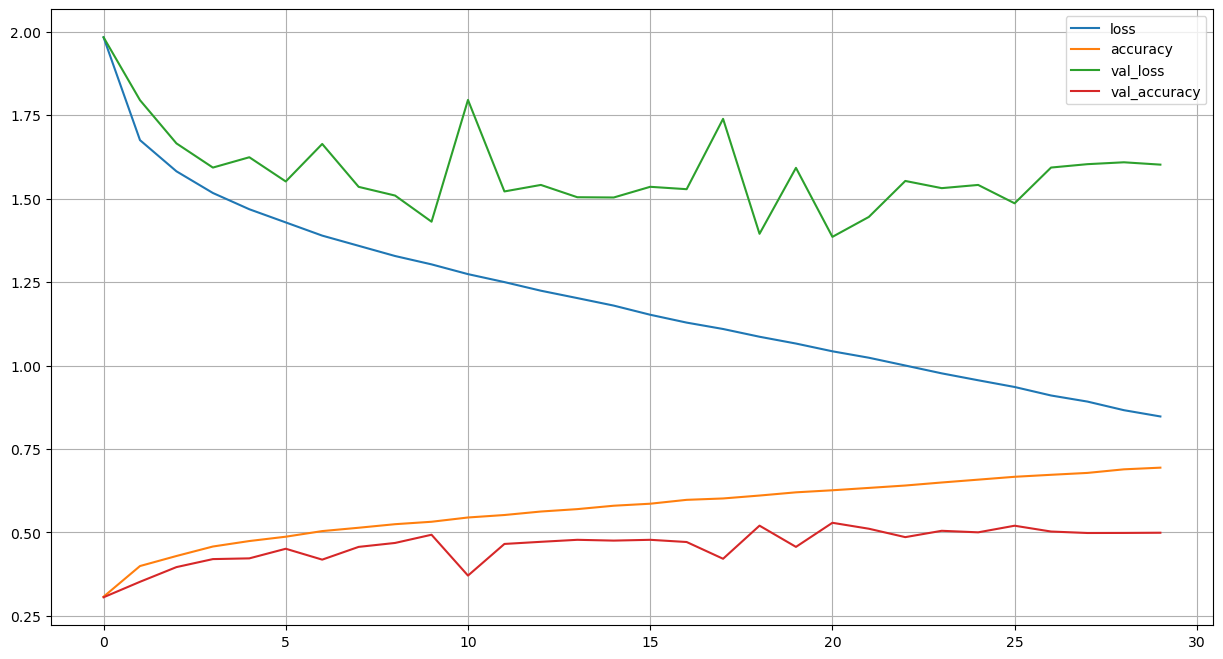

In [17]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5994 - accuracy: 0.4898


[1.5994412899017334, 0.48980000615119934]

In [19]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 1s 2ms/step


array([4, 8, 0, ..., 3, 4, 7], dtype=int64)

In [20]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

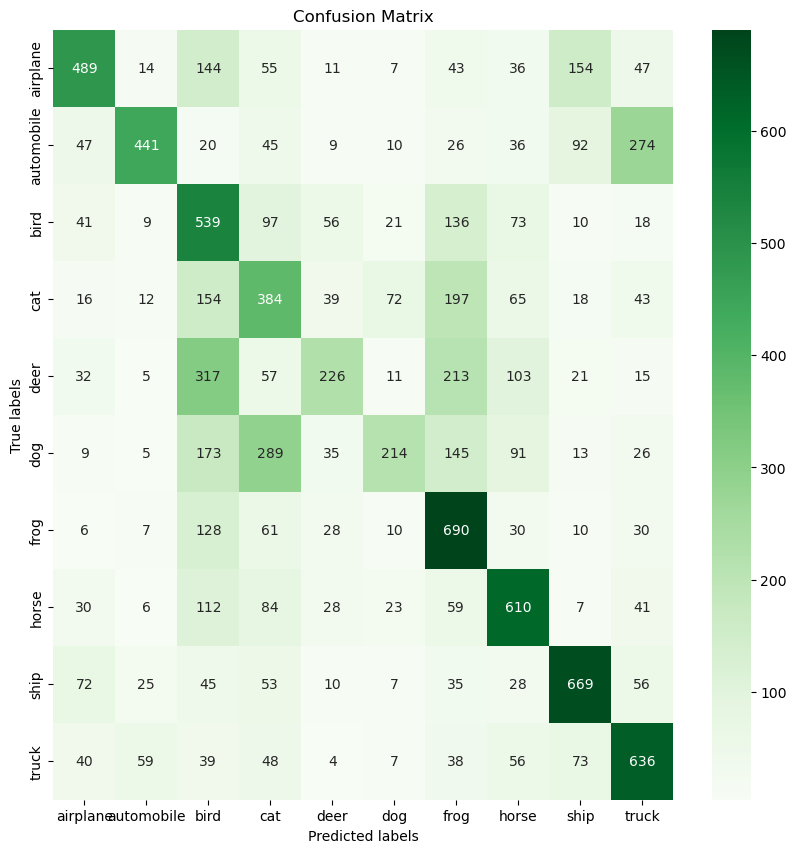

In [21]:
# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()

AlphaDropout

In [22]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[32,32,3]),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(300, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.AlphaDropout(rate=0.1),
            keras.layers.Dense(10, activation = "softmax")
            ])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 alpha_dropout (AlphaDropou  (None, 3072)              0         
 t)                                                              
                                                                 
 dense_6 (Dense)             (None, 300)               921900    
                                                                 
 alpha_dropout_1 (AlphaDrop  (None, 300)               0         
 out)                                                            
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 alpha_dropout_2 (AlphaDrop  (None, 300)              

In [24]:
model.layers

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32)

Epoch 1/30
1407/1407 [==============================] - 12s 7ms/step - loss: 2.2856 - accuracy: 0.1760 - val_loss: 2.2401 - val_accuracy: 0.2154
Epoch 2/30
1407/1407 [==============================] - 9s 7ms/step - loss: 2.0664 - accuracy: 0.2317 - val_loss: 2.1502 - val_accuracy: 0.2546
Epoch 3/30
1407/1407 [==============================] - 9s 7ms/step - loss: 2.0038 - accuracy: 0.2642 - val_loss: 2.0626 - val_accuracy: 0.2816
Epoch 4/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9692 - accuracy: 0.2780 - val_loss: 2.1779 - val_accuracy: 0.2920
Epoch 5/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9365 - accuracy: 0.2933 - val_loss: 1.9747 - val_accuracy: 0.3244
Epoch 6/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9137 - accuracy: 0.3031 - val_loss: 1.9709 - val_accuracy: 0.3398
Epoch 7/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8935 - accuracy: 0.3101 - val_loss: 1.9334 - val_accuracy

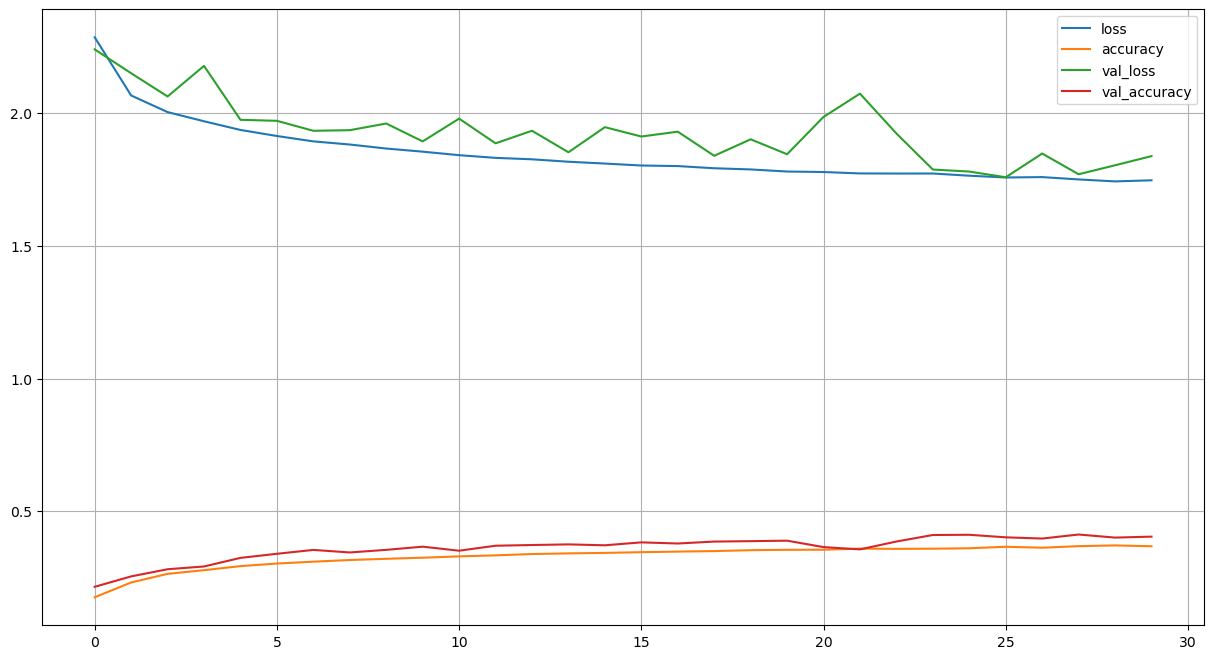

In [27]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8402 - accuracy: 0.4097


[1.8402349948883057, 0.4097000062465668]

In [29]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 5, 7], dtype=int64)

In [30]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

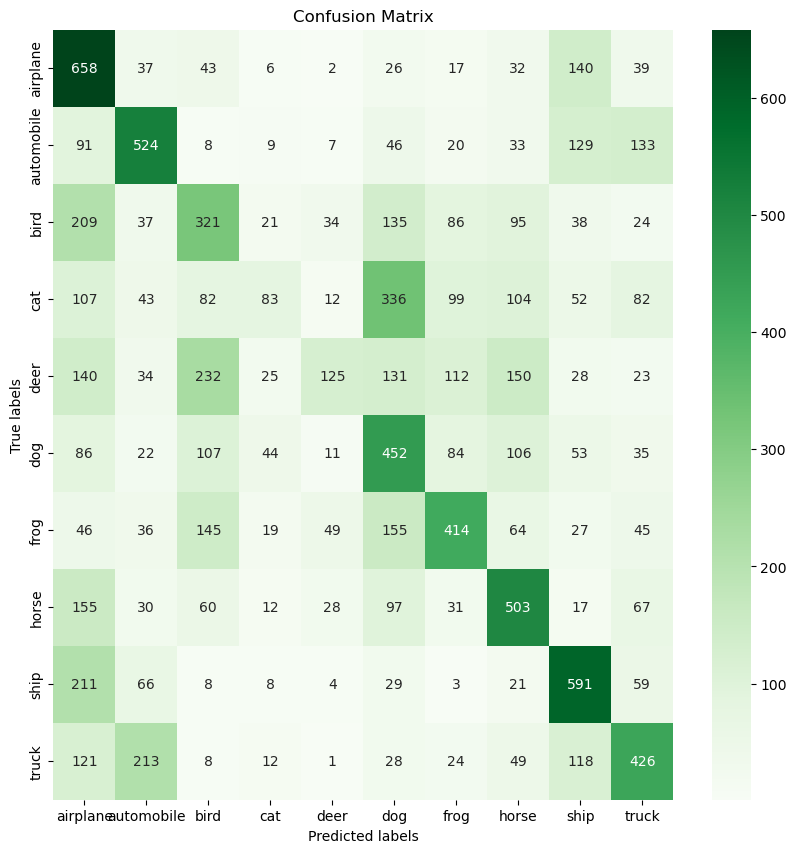

In [31]:
# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()

exponential_decay and epochs

In [32]:
def exponential_decay(epoch):
        return 0.01*0.1**(epoch/10)
    
exponential_decay_fn = exponential_decay
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [33]:
history = model.fit(X_train, y_train, epochs=60, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[lr_scheduler])

Epoch 1/60
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7380 - accuracy: 0.3712 - val_loss: 1.8527 - val_accuracy: 0.3988 - lr: 0.0100
Epoch 2/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7294 - accuracy: 0.3754 - val_loss: 1.8063 - val_accuracy: 0.4112 - lr: 0.0079
Epoch 3/60
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7224 - accuracy: 0.3762 - val_loss: 1.7994 - val_accuracy: 0.4114 - lr: 0.0063
Epoch 4/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7104 - accuracy: 0.3804 - val_loss: 1.7627 - val_accuracy: 0.4226 - lr: 0.0050
Epoch 5/60
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7030 - accuracy: 0.3837 - val_loss: 1.7693 - val_accuracy: 0.4200 - lr: 0.0040
Epoch 6/60
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7042 - accuracy: 0.3819 - val_loss: 1.7414 - val_accuracy: 0.4210 - lr: 0.0032
Epoch 7/60
1407/1407 [==============================] - 9

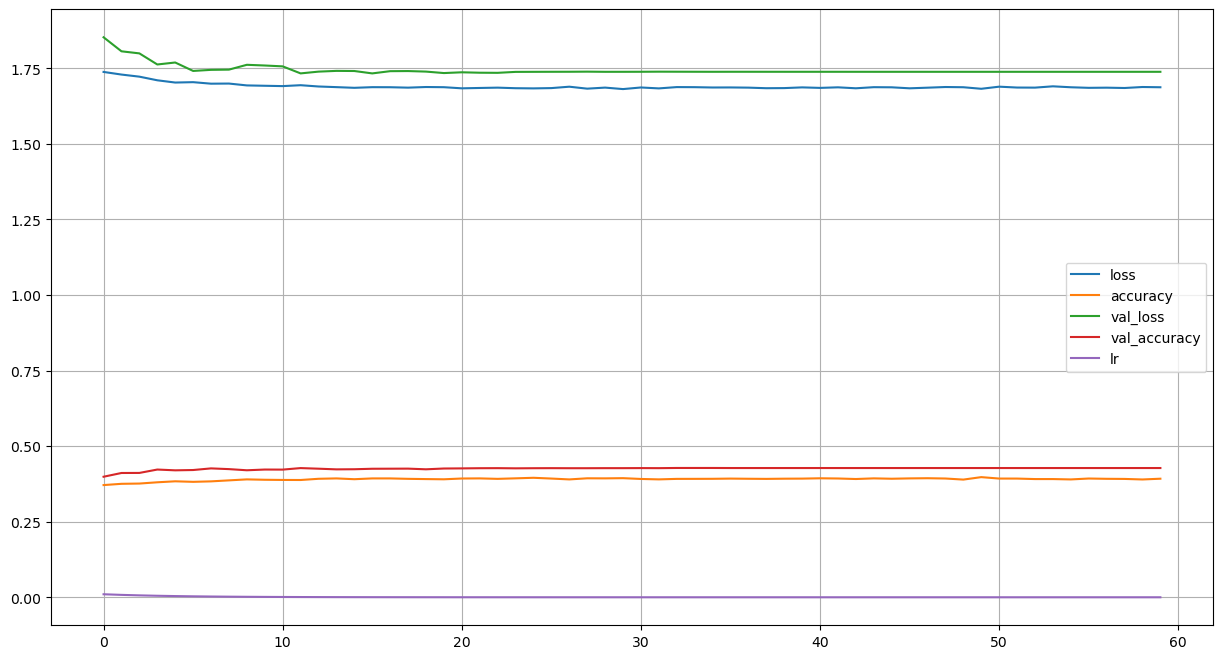

In [34]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7445 - accuracy: 0.4312


[1.7444967031478882, 0.4311999976634979]

In [36]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 5, 7], dtype=int64)

In [37]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

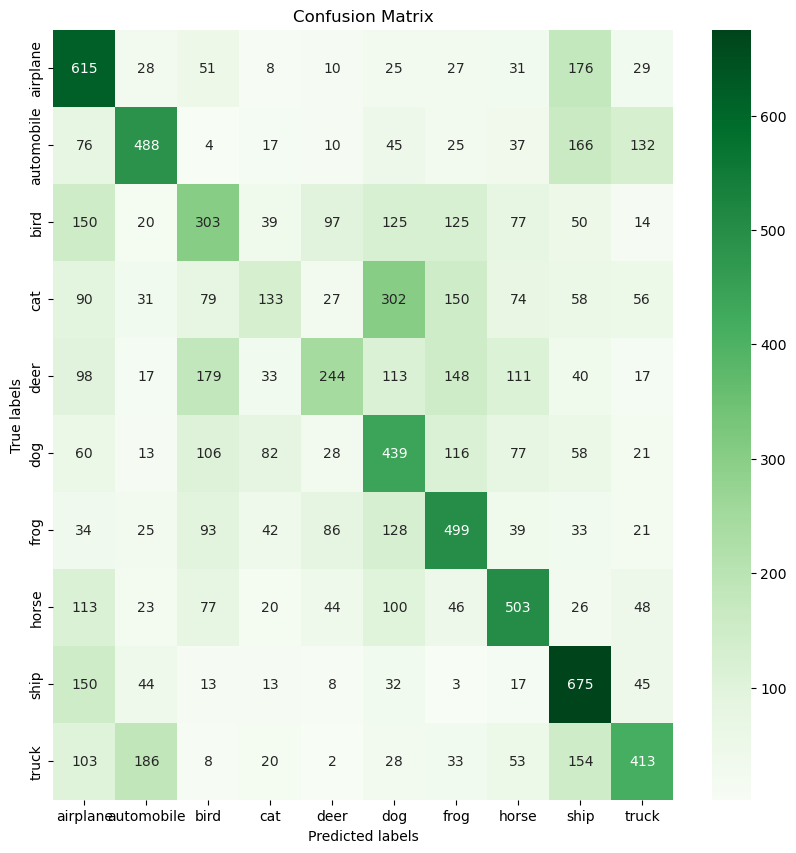

In [38]:
# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()

In [39]:
# # 1cycle learning rate scheduler
# # code from: https://pub.towardsai.net/1cycle-learning-rate-scheduling-with-tensorflow-and-keras-74ae7ce277c8
# class OneCycleScheduler(keras.callbacks.Callback):
#     def __init__(self, iterations, max_rate, start_rate=None,
#                  last_iterations=None, last_rate=None):
#         self.iterations = iterations
#         self.max_rate = max_rate
#         self.start_rate = start_rate or max_rate / 10
#         self.last_iterations = last_iterations or iterations // 10 + 1
#         self.half_iteration = (iterations - self.last_iterations) // 2
#         self.last_rate = last_rate or self.start_rate / 1000
#         self.iteration = 0
        
#     def _interpolate(self, iter1, iter2, rate1, rate2):
#         return ((rate2 - rate1) * (self.iteration - iter1)
#                 / (iter2 - iter1) + rate1)
    
#     def on_batch_begin(self, batch, logs):
#         if self.iteration < self.half_iteration:
#             rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
#         elif self.iteration < 2 * self.half_iteration:
#             rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
#                                      self.max_rate, self.start_rate)
#         else:
#             rate = self._interpolate(2 * self.half_iteration, self.iterations,
#                                      self.start_rate, self.last_rate)
#         self.iteration += 1
#         keras.backend.set_value(self.model.optimizer.lr, rate)
        

# onecycle = OneCycleScheduler(30,0.04)
# , callbacks=[onecycle]